# Plot quantum states

In many situations – such as learning or debugging – it's helpful to visualize the state of a quantum computer. Here we assume you already have a particular state from simulation or state tomography.  It's only possible to view the states of small quantum systems.

<Admonition title="Using the output from functions" type="tip">
All functions on this page return rich objects. When the last line of a code cell outputs these objects, Jupyter notebooks display them below the cell. If you call these functions in some other environments or in scripts, you will need to explicitly show or save the outputs.

Most functions return images, which are `matplotlib.Figure` objects. Two options are:
- Call `.show()` on the returned object to open the image in a new window (assuming your configured matplotlib backend is interactive).
- Call `.savefig("out.png")` to save the figure to `out.png` in the current working directory. The `savefig()` method takes a path so you can adjust the location and filename where you're saving the output. For example, `plot_state_city(psi).savefig("out.png")`.

The LaTeX outputs are `IPython.display.Latex` objects. The best option in a non-Jupyter environment is to avoid this output by either printing the state for a text representation, or switching to the `latex_source` drawer to return a LaTeX source string.
</Admonition>

A quantum state is either a density matrix $\rho$ (Hermitian matrix) or statevector $|\psi\rangle$ (complex vector). The density matrix is related to the statevector by

$$\rho = |\psi\rangle\langle \psi|,$$

and is more general, as it can represent mixed states (positive sum of statevectors)

$$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k |.$$

Qiskit represents quantum states through the `Statevector` and `DensityMatrix` classes and provides many visualization functions. See the sections after the following the code cell to see how Qiskit's different visualization functions plot the following quantum state.

In [1]:
from math import pi
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Create a Bell state for demonstration
qc = QuantumCircuit(2)
qc.h(0)
qc.crx(pi/2, 0, 1)
psi = Statevector(qc)

<Tabs>
<TabItem value="LaTeX" label="LaTeX">
  While not technically a "plot", Qiskit can render LaTeX representations of both `Statevector` and `DensityMatrix` objects that display nicely in Jupyter notebooks. These follow the standard mathematical conventions for writing down quantum states. Read more in [Basics of quantum information: Single systems](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems#quantum-state-vectors).

  Statevectors default to "ket notation", whereas density matrices are displayed as a 2×2 matrix.

  <CodeCellPlaceholder tag="id-tabs-latex" />

  <CodeCellPlaceholder tag="id-tabs-latex-2" />

  You can also replace `"latex"` with `"latex_source"` to get the raw LaTeX string.

</TabItem>
<TabItem value="City" label="City">

  This plot displays the real and imaginary parts of each density matrix element in two three-dimensional bar charts.  It's called a "city" plot because the bars resemble skyscrapers in a city. The state we're plotting has the following density matrix.

  $$
  \begin{bmatrix}
  \frac{1}{2} & \frac{\sqrt{2}}{4} & 0 & \frac{\sqrt{2} i}{4}  \\
  \frac{\sqrt{2}}{4} & \frac{1}{4} & 0 & \frac{i}{4}  \\
  0 & 0 & 0 & 0  \\
  - \frac{\sqrt{2} i}{4} & - \frac{i}{4} & 0 & \frac{1}{4}  \\
  \end{bmatrix}
  =
  \begin{bmatrix}
  \frac{1}{2} & \frac{\sqrt{2}}{4} & 0 & 0 \\
  \frac{\sqrt{2}}{4} & \frac{1}{4} & 0 & 0 \\
  0 & 0 & 0 & 0  \\
  0 & 0 & 0 & \frac{1}{4}  \\
  \end{bmatrix}
  + i
  \begin{bmatrix}
  0 & 0 & 0 & \frac{\sqrt{2} i}{4}  \\
  0 & 0 & 0 & \frac{i}{4}  \\
  0 & 0 & 0 & 0  \\
  - \frac{\sqrt{2} i}{4} & - \frac{i}{4} & 0 & 0 \\
  \end{bmatrix}
  $$

  <CodeCellPlaceholder tag="id-tabs-city" />

  See the [API documentation](/api/qiskit/qiskit.visualization.plot_state_city) for more information.


</TabItem>
<TabItem value="Hinton" label="Hinton">

  This plot is very similar to the "city" plot, but the magnitude of each element is represented by the size of a square rather than the height of a bar. White squares represent elements with positive values, and black squares represent elements with negative values. The state we're plotting has the following density matrix.

  $$
  \begin{bmatrix}
  \frac{1}{2} & \frac{\sqrt{2}}{4} & 0 & \frac{\sqrt{2} i}{4}  \\
  \frac{\sqrt{2}}{4} & \frac{1}{4} & 0 & \frac{i}{4}  \\
  0 & 0 & 0 & 0  \\
  - \frac{\sqrt{2} i}{4} & - \frac{i}{4} & 0 & \frac{1}{4}  \\
  \end{bmatrix}
  =
  \begin{bmatrix}
  \frac{1}{2} & \frac{\sqrt{2}}{4} & 0 & 0 \\
  \frac{\sqrt{2}}{4} & \frac{1}{4} & 0 & 0 \\
  0 & 0 & 0 & 0  \\
  0 & 0 & 0 & \frac{1}{4}  \\
  \end{bmatrix}
  + i
  \begin{bmatrix}
  0 & 0 & 0 & \frac{\sqrt{2} i}{4}  \\
  0 & 0 & 0 & \frac{i}{4}  \\
  0 & 0 & 0 & 0  \\
  - \frac{\sqrt{2} i}{4} & - \frac{i}{4} & 0 & 0 \\
  \end{bmatrix}
  $$

  <CodeCellPlaceholder tag="id-tabs-hinton" />

  See the [API documentation](/api/qiskit/qiskit.visualization.plot_state_hinton) for more information.


</TabItem>
<TabItem value="Pauli vector" label="Pauli vector">

  An observable is a way of measuring a quantum state such that the possible measurement outcomes are real numbers. The expected value of the outcome is also known as the expectation value of the observable on that state, and it can be thought of as the average of infinitely many observations of that state.

  Tensor products of Pauli matrices are all observables that return +1 or -1. This plot displays the expectation values of the state on different Pauli operators as a bar chart. All density matrices can be written as a sum of these Pauli matrices, weighted by their expectation values.

  For example, this state can be written as the sum of terms:

  $$
  |\psi\rangle\langle\psi|
  =
  \tfrac{1}{4}II
  + \tfrac{\sqrt{2}}{8}IX
  - \tfrac{\sqrt{2}}{8}XY
  - \tfrac{1}{8}YI
  - \tfrac{\sqrt{2}}{8}YX
  + \tfrac{1}{8}YZ
  + \tfrac{1}{8}ZI
  + \tfrac{\sqrt{2}}{8}ZX
  + \tfrac{1}{8}ZZ
  $$

  <CodeCellPlaceholder tag="id-tabs-paulivec" />

  You can also calculate these coefficients using `SparsePauliOp`.

  <CodeCellPlaceholder tag="id-tabs-paulivec-2" />

  See the [API documentation](/api/qiskit/qiskit.visualization.plot_state_paulivec) for more information.


</TabItem>
<TabItem value="Qsphere" label="Qsphere">

  The "QSphere" is a Qiskit-unique view of a quantum state in which the amplitude and phase of each element in a statevector is plotted on the surface of a sphere. The thickness of each dot represents the amplitude, and the color represents the phase. For mixed states it will show a sphere for each component.

  <CodeCellPlaceholder tag="id-tabs-qsphere" />

  See the [API documentation](/api/qiskit/qiskit.visualization.plot_state_qsphere) for more information.

</TabItem>
<TabItem value="Bloch" label="Bloch">

  The Bloch vector of a qubit state is its expectation value in the X, Y, and Z Pauli observables mapped to the X, Y, and Z axes in three-dimensional space. This plot projects multi-qubit quantum states onto the single-qubit space and plots each qubit on a Bloch sphere. This visualization only shows the expectation values of individual qubits. It can't show correlations between qubits and so can't fully describe entangled quantum states.

  <CodeCellPlaceholder tag="id-tabs-bloch" />

  See the [API documentation](/api/qiskit/qiskit.visualization.plot_bloch_multivector) for more information.

</TabItem>
</Tabs>

In [2]:
psi.draw("latex")  # psi is a Statevector object

<IPython.core.display.Latex object>

In [3]:
from qiskit.quantum_info import DensityMatrix
DensityMatrix(psi).draw("latex")  # convert to a DensityMatrix and draw

<IPython.core.display.Latex object>

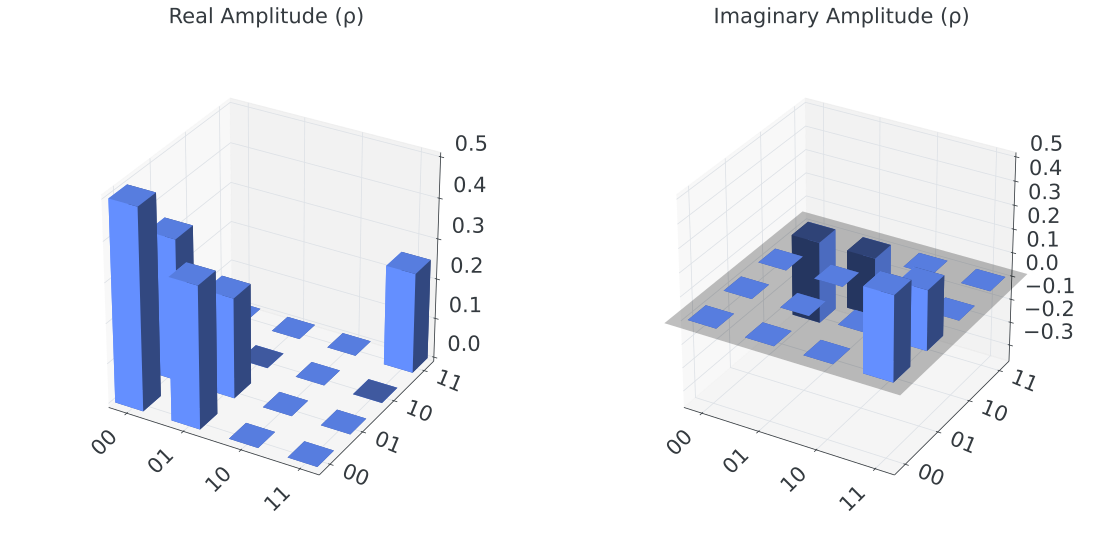

In [4]:
from qiskit.visualization import plot_state_city
plot_state_city(psi)
# Alternative: psi.draw("city")

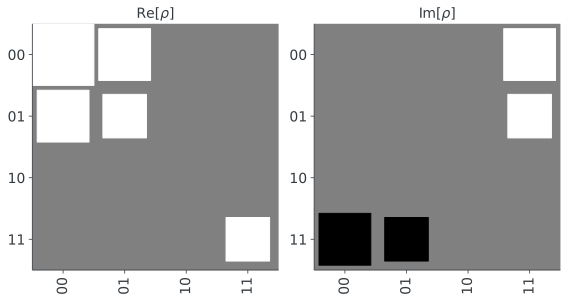

In [5]:
from qiskit.visualization import plot_state_hinton
plot_state_hinton(psi)
# Alternative: psi.draw("hinton")

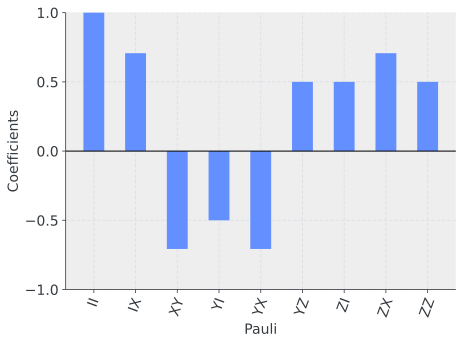

In [6]:
from qiskit.visualization import plot_state_paulivec
plot_state_paulivec(psi)
# Alternative: psi.draw("paulivec")

In [7]:
from qiskit.quantum_info import SparsePauliOp
SparsePauliOp.from_operator(psi)

SparsePauliOp(['II', 'IX', 'XY', 'YI', 'YX', 'YZ', 'ZI', 'ZX', 'ZZ'],
              coeffs=[ 0.25     +0.j,  0.1767767+0.j, -0.1767767+0.j, -0.125    +0.j,
 -0.1767767+0.j,  0.125    +0.j,  0.125    +0.j,  0.1767767+0.j,
  0.125    +0.j])

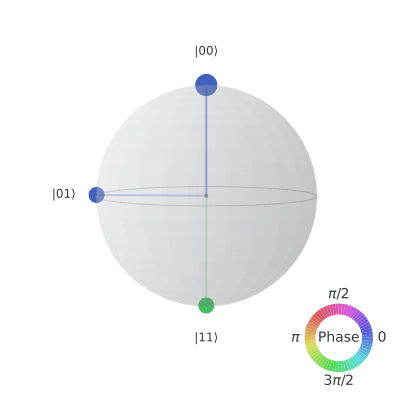

In [8]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(psi)
# Alternative: psi.draw("qsphere")

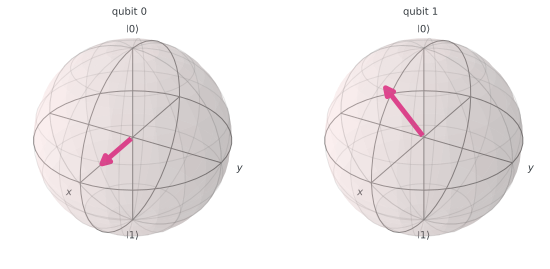

In [9]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(psi)
# Alternative: psi.draw("bloch")

## Options for state-plotting functions

All state-plotting functions accept the following arguments (except the LaTeX drawer, which doesn't return a Matplotlib figure, and `plot_state_qsphere`, which only accepts **figsize**):
- **title** (str): a string for the plot title, displayed at the top of the plot
- **figsize** (tuple): figure size in inches (width, height)

The `plot_state_city` and `plot_state_paulivec` functions also accept a **color** argument (list of strings) specifying the colors of the bars. See the [API documentation](/api/qiskit/visualization) for more information.

## Next steps

<Admonition type="tip" title="Recommendations">
  - Need to refresh your quantum information knowledge? Check out the [Basics of quantum information](https://learning.quantum.ibm.com/course/basics-of-quantum-information) course on IBM Quantum Learning.
  - Read the [contributing guidelines](https://github.com/Qiskit/qiskit/blob/main/CONTRIBUTING.md) if you want to contribute to the open-source Qiskit SDK.
</Admonition>